# Importing Libraries

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

# Loading DataFrame

In [178]:
df = pd.read_csv("bank_transactions.csv")

# Summarizing Data

In [179]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [180]:
df.shape

(20000, 9)

In [181]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.997300e+04,20000.000000,20000.000000
mean,1.210167e+05,175367.209050,1719.275140
std,7.257977e+05,38302.047099,7191.231331
min,0.000000e+00,400.000000,0.000000
25%,5.522240e+03,152832.250000,150.000000
50%,1.923772e+04,184551.500000,420.000000
75%,6.471620e+04,203633.000000,1149.625000
max,5.099967e+07,235951.000000,455122.000000


# Dropping NaN

In [182]:
df.dropna(inplace=True)

In [183]:
df.shape

(19889, 9)

In [184]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.988900e+04,19889.000000,19889.000000
mean,1.200352e+05,175436.701594,1710.874694
std,7.207429e+05,38276.312928,7195.339221
min,0.000000e+00,400.000000,0.000000
25%,5.522240e+03,152856.000000,150.000000
50%,1.915149e+04,184655.000000,419.520000
75%,6.445509e+04,203644.000000,1140.000000
max,5.099967e+07,235951.000000,455122.000000


In [185]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


# Getting Customer Age from Customer DOB

In [186]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True, errors='coerce')

In [187]:
today = datetime.now()
df['CustomerAge'] = round((today - df['CustomerDOB']).dt.days / 365)

In [188]:
valid_ages = df[(df['CustomerAge'] > 0) & (df['CustomerAge'] < 120)]['CustomerAge']
median_age = int(valid_ages.median())

In [189]:
df.loc[(df['CustomerAge'] < 0) | (df['CustomerAge'] > 120) | (df['CustomerAge'].isna()), 'CustomerAge'] = median_age

# Transforming the data for Machine Learning

In [190]:
scaler = StandardScaler()

In [191]:
df[['CustAccountBalance_T', 'TransactionAmount (INR)_T', 'CustomerAge_T']] = scaler.fit_transform(df[[
    'CustAccountBalance','TransactionAmount (INR)', 'CustomerAge']])

In [192]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,CustAccountBalance_T,TransactionAmount (INR)_T,CustomerAge_T
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0,32.0,-0.141824,-0.234307,-0.941570
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0,68.0,-0.163397,3.653585,3.237294
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,02-08-2016,142712,459.0,29.0,-0.141747,-0.173988,-1.289809
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,02-08-2016,142714,2060.0,52.0,1.035719,0.048522,1.380021
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5,37.0,-0.157232,0.007175,-0.361172


# Identifying the number of clusters

In [193]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

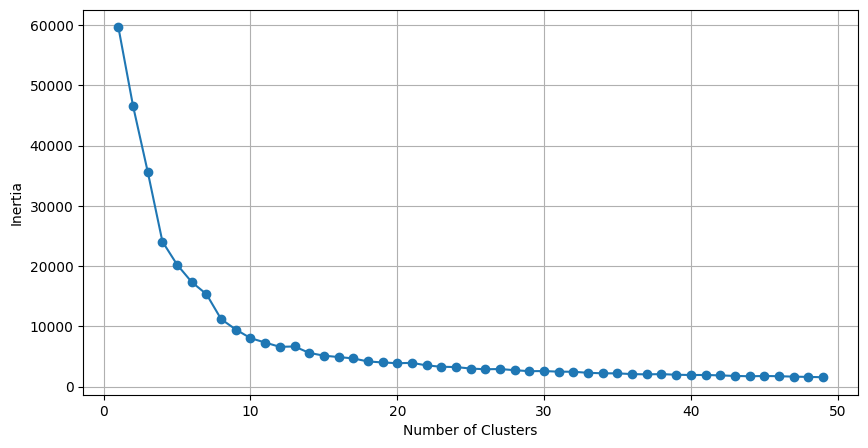

In [194]:
optimize_k_means(df[['CustAccountBalance_T', 'TransactionAmount (INR)_T', 'CustomerAge_T']], 50)

By observing this 4 seems good

# Applying K-Clustering

In [195]:
kmeans = KMeans(n_clusters=4)

In [196]:
kmeans.fit(df[['CustAccountBalance_T', 'TransactionAmount (INR)_T', 'CustomerAge_T']])

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [197]:
df['kmeans_4'] = kmeans.labels_

In [198]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,CustAccountBalance_T,TransactionAmount (INR)_T,CustomerAge_T,kmeans_4
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0,32.0,-0.141824,-0.234307,-0.941570,1
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0,68.0,-0.163397,3.653585,3.237294,3
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,02-08-2016,142712,459.0,29.0,-0.141747,-0.173988,-1.289809,1
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,02-08-2016,142714,2060.0,52.0,1.035719,0.048522,1.380021,3
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5,37.0,-0.157232,0.007175,-0.361172,1


# Plotting the Results

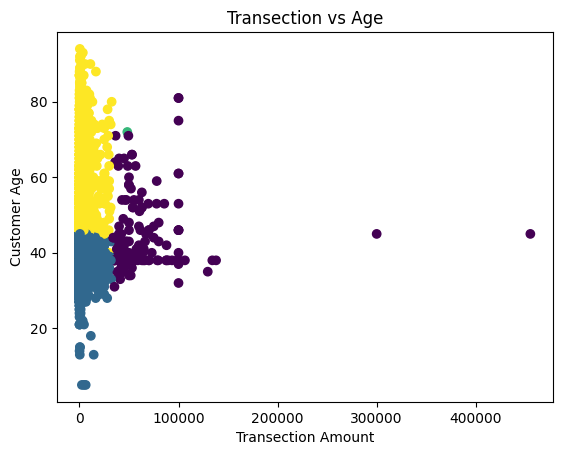

In [199]:
plt.scatter(x=df['TransactionAmount (INR)'], y=df['CustomerAge'], c=df['kmeans_4'])
plt.xlabel("Transection Amount")
plt.ylabel("Customer Age")
plt.title("Transection vs Age")
plt.show()

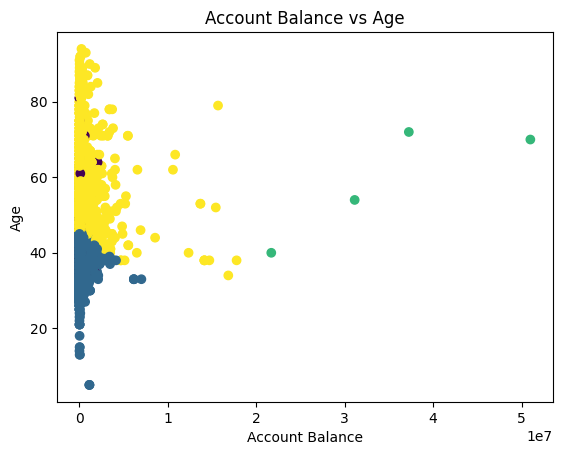

In [200]:
plt.scatter(x=df['CustAccountBalance'], y=df['CustomerAge'], c=df['kmeans_4'])
plt.xlabel("Account Balance")
plt.ylabel("Age")
plt.title("Account Balance vs Age")
plt.show()

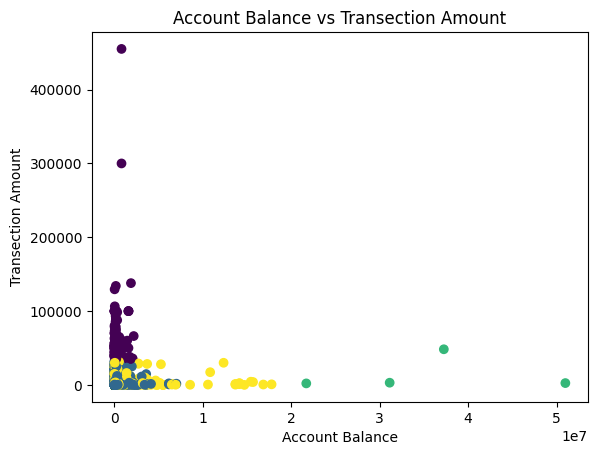

In [201]:
plt.scatter(x=df['CustAccountBalance'], y=df['TransactionAmount (INR)'], c=df['kmeans_4'])
plt.xlabel("Account Balance")
plt.ylabel("Transection Amount")
plt.title("Account Balance vs Transection Amount")
plt.show()

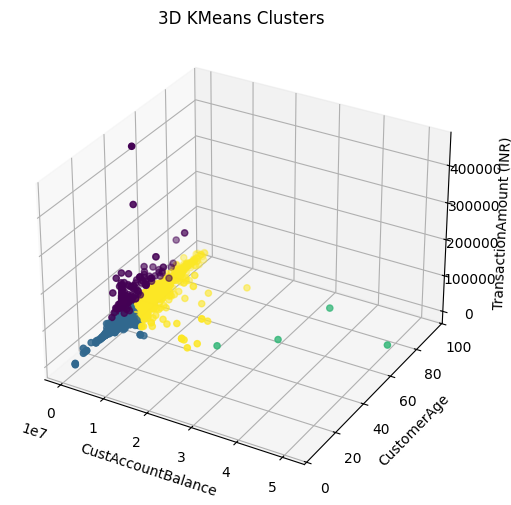

In [203]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['CustAccountBalance'], 
    df['CustomerAge'], 
    df['TransactionAmount (INR)'], 
    c=df['kmeans_4'], cmap='viridis'
)

ax.set_xlabel('CustAccountBalance')
ax.set_ylabel('CustomerAge')
ax.set_zlabel('TransactionAmount (INR)')
plt.title("3D KMeans Clusters")
plt.show()